In [43]:
import pandas as pd

# Исследуем данные train

In [44]:
train = pd.read_csv('train.csv', index_col=0, dtype = {'row_id': 'int64',
                                                       'timestamp': 'int64',
                                                       'user_id': 'int32',
                                                       'content_id': 'int16',
                                                       'content_type_id': 'int8',
                                                       'task_container_id': 'int16',
                                                       'user_answer': 'int8',
                                                       'answered_correctly': 'int8',
                                                       'prior_question_elapsed_time': 'float32',
                                                       'prior_question_had_explanation': 'boolean'})

C:\Anaconda\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [45]:
train.head()

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
row_id,,,,,,,,,
0,0,115,5692,0,1,3,1,NaN,<NA>
1,56943,115,5716,0,2,2,1,37000.0,False
2,118363,115,128,0,0,0,1,55000.0,False
3,131167,115,7860,0,3,0,1,19000.0,False
4,137965,115,7922,0,4,1,1,11000.0,False


In [46]:
unique_list = []
for col in train.columns:
    new_col = (col, train[col].nunique(), train[col].dtype)
    unique_list.append(new_col)
unique_counts = pd.DataFrame(unique_list,
                             columns=['column_name', 'count_uniq', 'type']
                            ).sort_values(by='count_uniq',  ignore_index=True)
display(unique_counts)

,column_name,count_uniq,type
0,content_type_id,2,int8
1,prior_question_had_explanation,2,boolean
2,answered_correctly,3,int8
3,user_answer,5,int8
4,prior_question_elapsed_time,3258,float32
5,task_container_id,10000,int16
6,content_id,13782,int16
7,user_id,393656,int32
8,timestamp,72821015,int64


In [47]:
train['content_type_id'].value_counts()
# 0 - вопросы
# 1 - лекции

0    99271300
1     1959032
Name: content_type_id, dtype: int64

In [48]:
round((train[train['answered_correctly']!=-1]['answered_correctly'].value_counts(normalize=True))*100)
# 1 - верные ответы
# 0 - неверные ответы

1    66.0
0    34.0
Name: answered_correctly, dtype: float64

In [49]:
# Количество секунд, в среднем затраченное на ответ
round((train['prior_question_elapsed_time'].mean())/1000)

13

In [50]:
# Cреднее число отвеченных вопросов
round(train[train['content_type_id'] == 0].shape[0] / train['user_id'].nunique())

252

In [51]:
# Среднее кол-во правильных ответов
round(train[train['answered_correctly'] != -1]['answered_correctly'].sum() / train['user_id'].nunique())

166

In [52]:
# Среднее число просмотренных лекций
round(train[train['content_type_id'] == 1].shape[0] / train['user_id'].nunique())

5

In [53]:
# Среднее число студентов, видевших объяснения
round(train['prior_question_had_explanation'].sum() / train['user_id'].nunique())

228

## Краткие выводы по первой части:
Всего в датафрейме информация о 393656 студентах

В среднем ответ на вопрос у студентов занимает 13 секунд

Основная активность студентов приходится на ответы на вопросы (98%), а на лекции уходит 2% времени

Правильные ответы составляют 66%, неправильные - 34%

Среднее число отвеченных вопросов равно 252

Среднее колтичество правильных ответов равно 166

Среднее число просмотренных лекций равно 5

Среднее число студентов, просматривавших объяснения, равно 228

# Исследуем данные questions

In [54]:
questions = pd.read_csv('questions.csv', sep=',', dtype = {'question_id': 'int16', 
                                                           'bundle_id': 'int16', 
                                                           'correct_answer': 'int8',
                                                           'part': 'int8', 
                                                           'tags': 'object'})

In [55]:
questions.shape

(13523, 5)

In [56]:
unique_list_q = []
for col in questions.columns:
    new_col = (col, questions[col].nunique(), questions[col].dtype)
    unique_list_q.append(new_col)
unique_counts_q = pd.DataFrame(unique_list_q,
                               columns=['column_name', 'count_uniq', 'type']
                              ).sort_values(by='count_uniq',  ignore_index=True)
display(unique_counts_q)

,column_name,count_uniq,type
0,correct_answer,4,int8
1,part,7,int8
2,tags,1519,object
3,bundle_id,9765,int16
4,question_id,13523,int16


In [57]:
# Количество разделов
questions['part'].value_counts(normalize=True)

5    0.407528
2    0.121793
3    0.115507
4    0.106411
6    0.089625
7    0.085780
1    0.073357
Name: part, dtype: float64

In [58]:
questions['tags'].describe()

count     13522
unique     1519
top           8
freq        738
Name: tags, dtype: object

In [59]:
questions['tags'] = questions['tags'].astype(str)

tags = [x.split() for x in questions[questions.tags != "nan"].tags.values]
tags = [item for elem in tags for item in elem]
tags = set(tags)
tags = list(tags)
print(len(tags))

188


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7')])

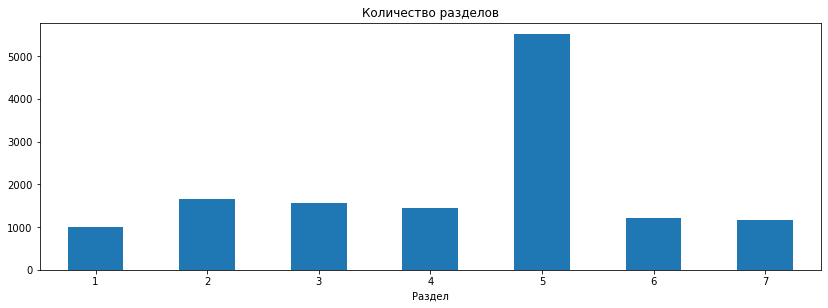

In [60]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(211)
ax1 = questions.groupby("part").count()['question_id'].plot.bar()
plt.title("Количество разделов")
plt.xlabel("Раздел")
plt.xticks(rotation=0)


## Краткие выводы по второй части:
На платформе 13523 вопроса

Всего 7 разделов

Существует 188 различных тэгов

В части 5 больше всего вопросов

# Исследуем данные lectures

In [61]:
lectures = pd.read_csv('lectures.csv', sep=',',
                      dtype = {'lecture_id': 'int16', 'tag': 'int16', 
                               'part': 'int8', 'type_of': 'object'})

In [62]:
lectures.head()

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question


In [63]:
lectures.shape

(418, 4)

In [64]:
unique_list_lec = []
for col in lectures.columns:
    item = (col, lectures[col].nunique(), lectures[col].dtype)
    unique_list_lec.append(item)
unique_counts_lec = pd.DataFrame(unique_list_lec,
                                 columns=['Column_Name', 'Num_Unique', 'Type']
                                ).sort_values(by='Num_Unique',  ignore_index=True)
display(unique_counts_lec)

,Column_Name,Num_Unique,Type
0,type_of,4,object
1,part,7,int8
2,tag,151,int16
3,lecture_id,418,int16


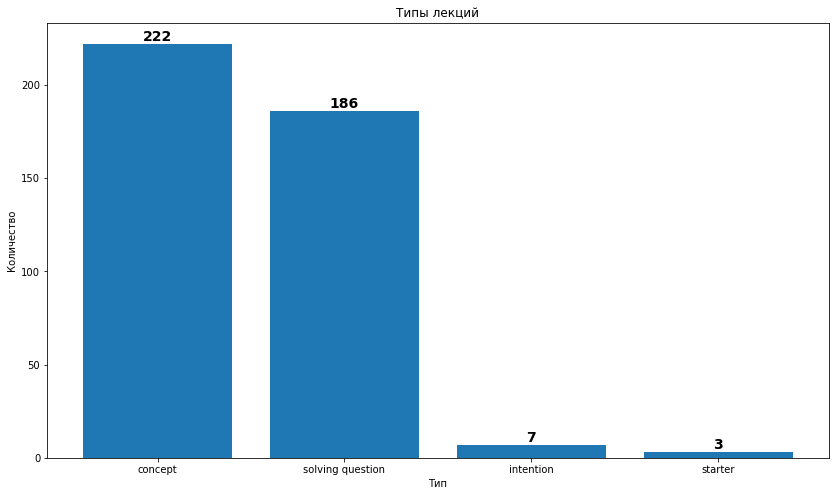

In [65]:
lect_type = lectures.type_of.value_counts()

fig = plt.figure(figsize=(14,8))
plt.bar(lect_type.index, lect_type.values)
for i, v in zip(lect_type.index, lect_type.values):
    plt.text(i, v, v, color='black', fontweight='bold', fontsize=14, va='bottom', ha='center')
plt.title("Типы лекций")
plt.xlabel("Тип")
plt.ylabel("Количество")
plt.xticks(rotation=0)
plt.show()

False    244050
True     149606
Name: Watches_lecture, dtype: int64


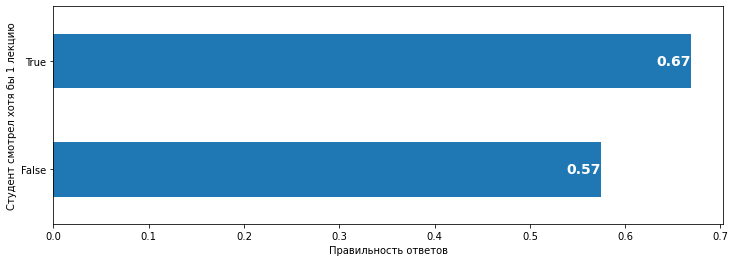

In [66]:
import numpy as np
us_lect = train.groupby(["user_id", "answered_correctly"]).size().unstack()
us_lect.columns = ['Lecture', 'Wrong', 'Right']
us_lect['Lecture'] = us_lect['Lecture'].fillna(0)
us_lect = us_lect.astype('Int64')
us_lect['Watches_lecture'] = np.where(us_lect.Lecture > 0, True, False)

watches_lect = us_lect.groupby("Watches_lecture").agg({'Wrong': ['sum'], 'Right': ['sum']})
print(us_lect.Watches_lecture.value_counts())

watches_lect['Percent_correct'] = watches_lect.Right/(watches_lect.Right + watches_lect.Wrong)

watches_lect = watches_lect.iloc[:,2]

fig = plt.figure(figsize=(12,4))
watches_lect.plot.barh()
for i, v in zip(watches_lect.index, watches_lect.values):
    plt.text(v, i, round(v,2), color='white', fontweight='bold', fontsize=14, ha='right', va='center')

plt.xlabel("Правильность ответов")
plt.ylabel("Студент смотрел хотя бы 1 лекцию")
plt.xticks(rotation=0)
plt.show()

## Краткие выводы по третьей части:
Всего 418 идентификаторов лекций

Всего 4 типа лекций

Преобладающим типом лекции является 'concept'

Студенты, смотревшие хотя бы одну лекцию, чаще остальных отвечают на вопросы правильно